In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
%matplotlib inline

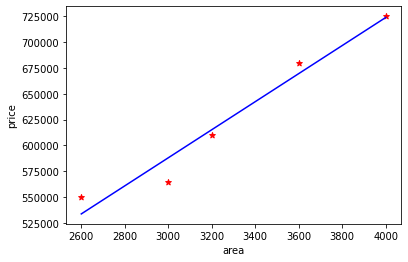

In [82]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,color='red',marker="*")
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [77]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)
reg

LinearRegression()

In [78]:
reg.predict([[3300]])

C:\Users\Crown Tech\miniconda3\envs\learningpython\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [23]:
reg.coef_

array([135.78767123])

In [24]:
reg.intercept_

180616.43835616432

In [64]:
df1 = pd.read_csv("areas.csv")
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [69]:
p= reg.predict(df1[['area']])

In [70]:
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [58]:
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [74]:
df1['prices'] = p
df1

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [75]:
df1.to_csv("pridection.csv",index=False)

In [ ]:
#Exercise

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot  as plt

In [2]:
df = pd.read_csv("canada_per_capita_income.csv")

In [3]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
%matplotlib inline

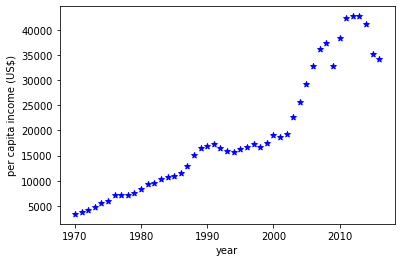

In [5]:
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df['year'],df['per capita income (US$)'],color='blue',marker='*')

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [7]:
reg.predict([[2020]])

C:\Users\Crown Tech\miniconda3\envs\learningpython\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

# Linear Regression with multiple variables 

In [11]:
df = pd.read_csv("homeprices.csv")

In [12]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [16]:
num = df.bedrooms.median()

In [18]:
df.bedrooms = df['bedrooms'].fillna(num)

In [19]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [21]:
from sklearn import linear_model

In [22]:
reg = linear_model.LinearRegression()

In [23]:
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [24]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [25]:
reg.intercept_

221323.0018654043

In [28]:
reg.predict([[3000,3,40]])

C:\Users\Crown Tech\miniconda3\envs\learningpython\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

# Hiring Exercise multiple linear Regression

In [58]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt 
from word2number import w2n

In [40]:
df = pd.read_csv("hiring.csv")

In [64]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [41]:
df.experience = df.experience.fillna("zero")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 384.0 bytes


In [62]:
df.experience = df.experience.apply(w2n.word_to_num)

In [46]:
num = df['test_score(out of 10)'].median()
num

8.0

In [53]:
df['test_score(out of 10)'] =df['test_score(out of 10)'].fillna(num)

In [66]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [70]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [73]:
reg.predict([[0,8,9]])

C:\Users\Crown Tech\miniconda3\envs\learningpython\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52350.0727802])